In [2]:
import pandas as pd

df = pd.read_excel("/Users/moad/Desktop/NLP/data/customer_responses_2025.xlsx")
pd.set_option('display.max_colwidth', None)

### Preprocessing the data

#### Required functions

In [3]:
import cleaning
from cleaning import cleaning_text, lemming, token, clean_df

#### Renaming columns and mapping

In [5]:
columns = ['How likely are you to recommend Edinburgh Airport to a friend or colleague?',
           'Overall, were you satisfied with your most recent experience at Edinburgh Airport?',
           'Are there any premium services that you would like to see introduced at Edinburgh?',
           'Do you have any other feedback or suggestions?']

column_mapping = {columns[0] : 'Rates',
                  columns[1] : 'Satisfaction',
                  columns[2] : 'Services_suggestions',
                  columns[3] : 'Feedbacks'} 

satisfaction_mapping = {'Yes' : 1, 'No':0}

In [6]:
df_clean = clean_df(df, columns, column_mapping, satisfaction_mapping)
df_clean.head()

,Rates,Satisfaction,Feedbacks_clean,Feedbacks_lem,Feedbacks_tokens,Suggestions_clean,Suggestions_lem,Suggestions_tokens
0,9.0,1.0,no,,[],no,,[]
1,10.0,1.0,no,,[],no,,[]
2,5.0,0.0,sort out the airport own parking so it works when you prepay,sort parking work prepay,"[sort, parking, work, prepay]",just get the basics right first and keep them right the auto passport readers now work very quickly this was previously a problem and still is at other airports,get basic right first keep right auto passport reader work quickly previously problem still airport,"[get, basic, right, first, keep, right, auto, passport, reader, work, quickly, previously, problem, still, airport]"
3,9.0,1.0,no,,[],no,,[]
4,10.0,1.0,no,,[],no,,[]


#### Defining our DataFrames

In [7]:
mask_feedback = df_clean['Feedbacks_lem'].apply(lambda x: len(x) > 5)
mask_suggestion = df_clean['Suggestions_lem'].apply(lambda x: len(x) > 15)

columns_feedback = ['Rates','Satisfaction','Feedbacks_clean','Feedbacks_lem','Feedbacks_tokens']
columns_suggestion = ['Rates','Satisfaction','Suggestions_clean','Suggestions_lem','Suggestions_tokens']

df_feedback = df_clean[mask_feedback]
df_suggestion = df_clean[mask_suggestion]

df_feedback = df_feedback[columns_feedback]
df_suggestion = df_suggestion[columns_suggestion]

display(df_feedback.head(5))
display(df_suggestion.head(5))

,Rates,Satisfaction,Feedbacks_clean,Feedbacks_lem,Feedbacks_tokens
2,5.0,0.0,sort out the airport own parking so it works when you prepay,sort parking work prepay,"[sort, parking, work, prepay]"
9,10.0,1.0,was a first time thru edinburgh airport and was excellent all around service,first time thru excellent around service,"[first, time, thru, excellent, around, service]"
15,5.0,1.0,the british airways check in staff were very kind and helpful,british airway check staff kind helpful,"[british, airway, check, staff, kind, helpful]"
16,9.0,1.0,there should more easy accesible internet,easy accesible internet,"[easy, accesible, internet]"
17,10.0,1.0,gate advisory not less than an hour from departure,gate advisory less hour departure,"[gate, advisory, less, hour, departure]"


,Rates,Satisfaction,Suggestions_clean,Suggestions_lem,Suggestions_tokens
2,5.0,0.0,just get the basics right first and keep them right the auto passport readers now work very quickly this was previously a problem and still is at other airports,get basic right first keep right auto passport reader work quickly previously problem still airport,"[get, basic, right, first, keep, right, auto, passport, reader, work, quickly, previously, problem, still, airport]"
6,10.0,1.0,i prepare for make more sitting areas because i saw many people are standing before waiting for the check in,prepare make sitting area saw many people standing waiting check,"[prepare, make, sitting, area, saw, many, people, standing, waiting, check]"
17,10.0,1.0,tour guide for those who have to hrs or staying over night,tour guide hr staying night,"[tour, guide, hr, staying, night]"
23,8.0,1.0,sleeping pods reclining chairs,sleeping pod reclining chair,"[sleeping, pod, reclining, chair]"
33,6.0,0.0,i do not agree with premium services decent services should be available to all,agree premium service decent service available,"[agree, premium, service, decent, service, available]"


## Sentiment Analysis : Vader

#### Required functions

In [8]:
import sentiment_analysis
from sentiment_analysis import sentiment_score, scoring_vader, plot_sentiment, heatmap
'''
import importlib
importlib.reload(sentiment_analysis)
'''

'\nimport importlib\nimportlib.reload(sentiment_analysis)\n'

#### Defining our DataFrames

In [9]:
vader_feedback = scoring_vader(df_feedback, 'Feedbacks_lem')
vader_suggestion = scoring_vader(df_suggestion, 'Suggestions_lem')

display(vader_feedback.head(3))
display(vader_suggestion.head(3))

,neg,neu,pos,compound,Satisfaction,Rates
0,0.0,1.000,0.000,0.0000,0.0,5.0
1,0.0,0.575,0.425,0.5719,1.0,10.0
2,0.0,0.392,0.608,0.7351,1.0,5.0


,neg,neu,pos,compound,Satisfaction,Rates
0,0.162,0.838,0.0,-0.4019,0.0,5.0
1,0.000,1.000,0.0,0.0000,1.0,10.0
2,0.000,1.000,0.0,0.0000,1.0,10.0


#### Plotting our analysis

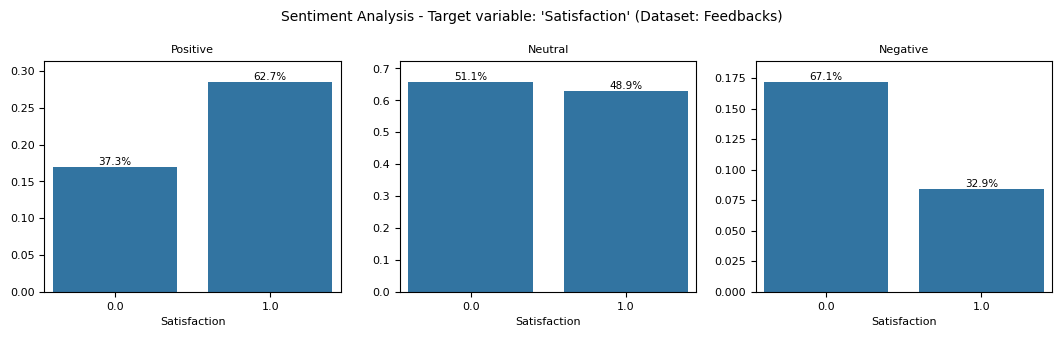

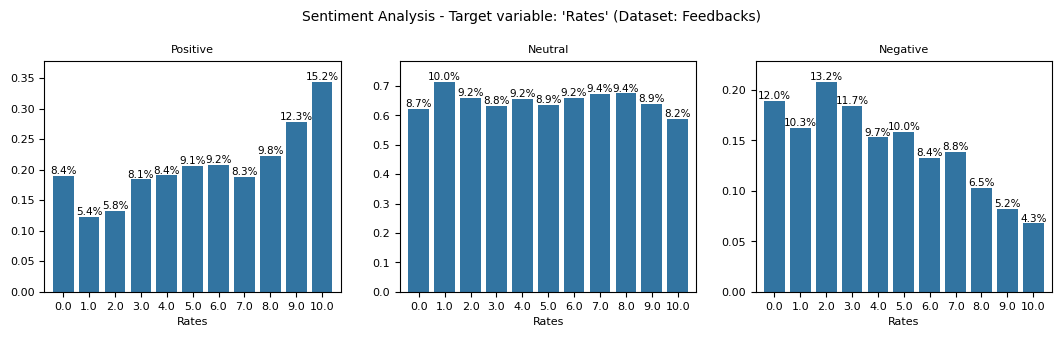

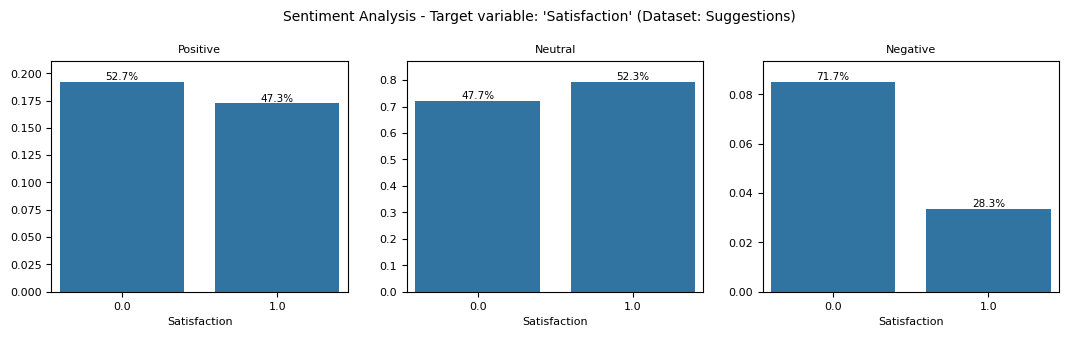

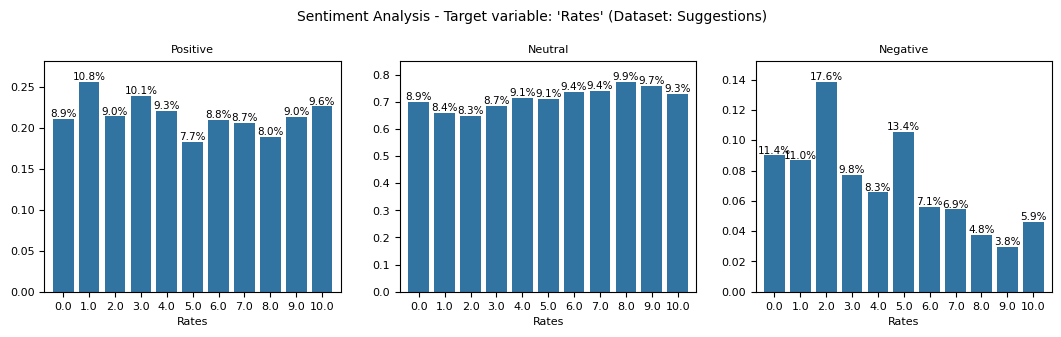

In [10]:
plot_sentiment('Satisfaction', vader_feedback, 'Feedbacks')
plot_sentiment('Rates', vader_feedback, 'Feedbacks')
plot_sentiment('Satisfaction', vader_suggestion, 'Suggestions')
plot_sentiment('Rates', vader_suggestion, 'Suggestions')

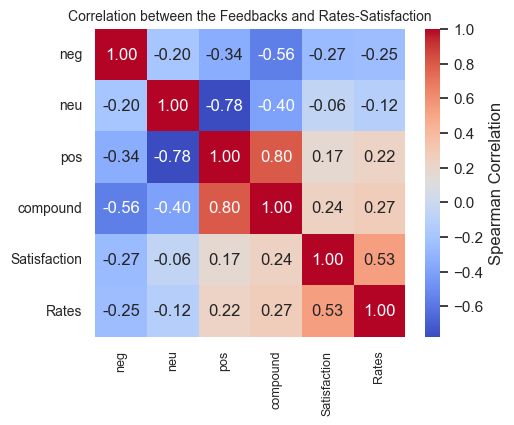

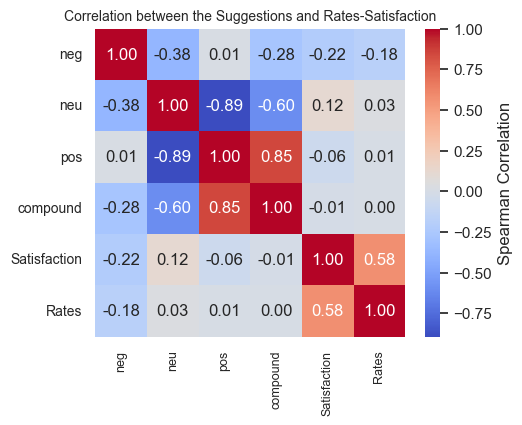

In [11]:
heatmap(vader_feedback,"Correlation between the Feedbacks and Rates-Satisfaction")
heatmap(vader_suggestion,"Correlation between the Suggestions and Rates-Satisfaction")

## Sentiment Analysis : RoBERTa

#### Required Functions

In [12]:
import sentiment_analysis
from sentiment_analysis import polarity_scores_robert, scoring_roberta

#### Defining our DataFrames

In [13]:
roberta_feedback = scoring_roberta(df_feedback, 'Feedbacks_lem')
roberta_suggestion = scoring_roberta(df_suggestion, 'Suggestions_lem')

100%|█████████████████████████████████████████| 881/881 [00:43<00:00, 20.19it/s]


#### Plotting our analysis

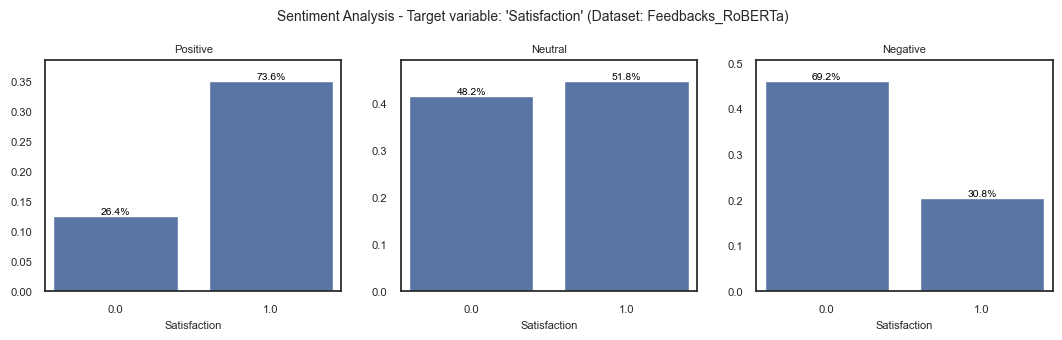

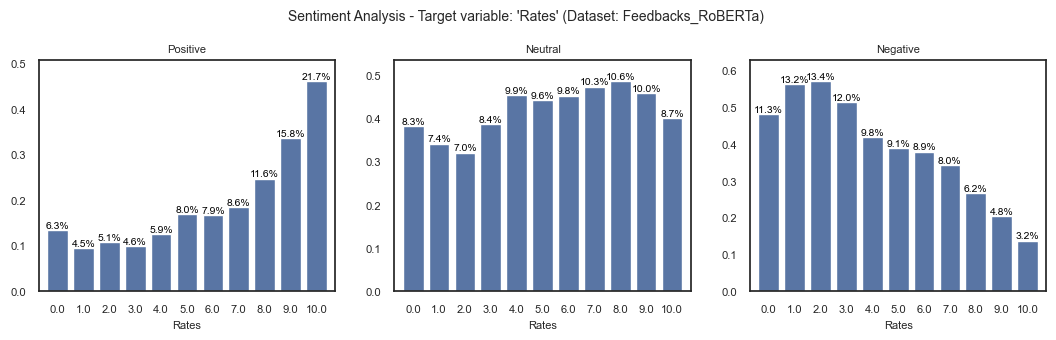

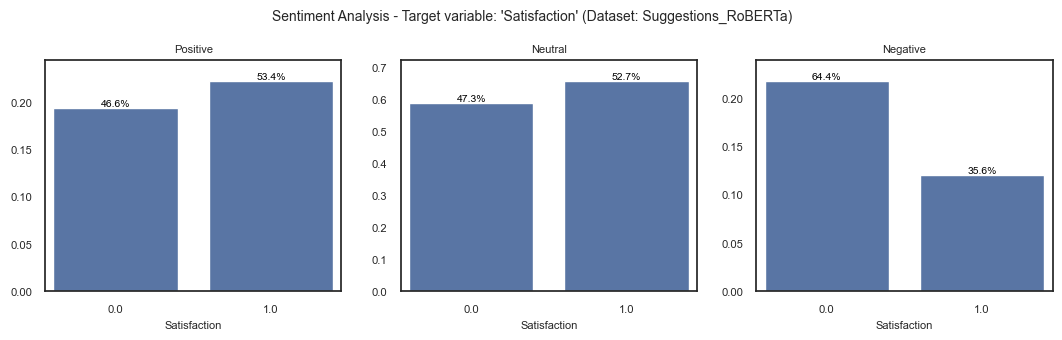

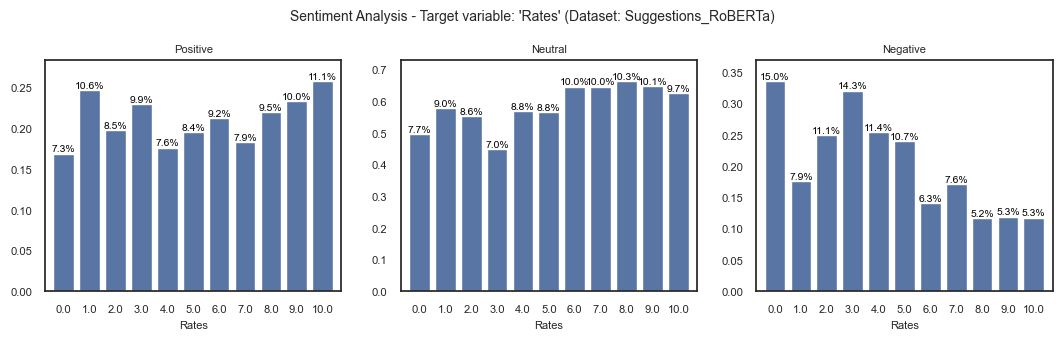

In [14]:
plot_sentiment('Satisfaction', roberta_feedback, 'Feedbacks_RoBERTa', True)
plot_sentiment('Rates', roberta_feedback, 'Feedbacks_RoBERTa', True)
plot_sentiment('Satisfaction', roberta_suggestion, 'Suggestions_RoBERTa', True)
plot_sentiment('Rates', roberta_suggestion, 'Suggestions_RoBERTa', True)

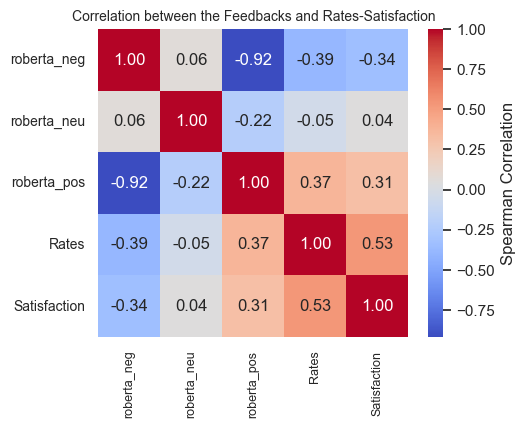

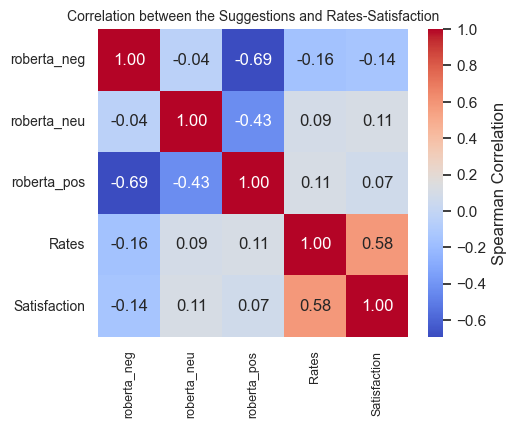

In [15]:
column_heatmap = ['roberta_neg','roberta_neu','roberta_pos','Rates','Satisfaction']
heatmap(roberta_feedback[column_heatmap],"Correlation between the Feedbacks and Rates-Satisfaction")
heatmap(roberta_suggestion[column_heatmap],"Correlation between the Suggestions and Rates-Satisfaction")

## Distribution of satisfaction in our DataFrames

#### Required functions

In [179]:
import prediction_script
from prediction_script import distribution

#### Plotting Distributions

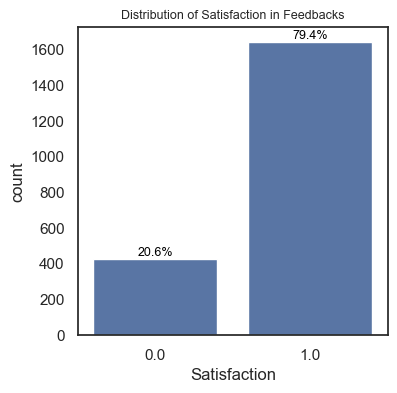

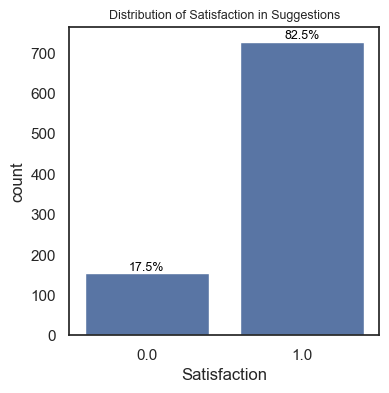

In [180]:
distribution(df_feedback,'Satisfaction','Feedbacks') 
distribution(df_suggestion,'Satisfaction','Suggestions')

## Prediction of satisfaction

#### Required Functions

In [181]:
import prediction_script
from prediction_script import metrics, plot_curve
from xgboost import XGBClassifier
from imblearn.under_sampling import RandomUnderSampler  
from imblearn.over_sampling import RandomOverSampler

#### Required DataFrames : deletes nan in the target

In [182]:
df_feedback_no_na = df_feedback.dropna(subset = ['Satisfaction']).copy()
df_suggestion_no_na = df_suggestion.dropna(subset = ['Satisfaction']).copy()

#### Defining our model and samplers

In [183]:
xgb_feedback = XGBClassifier(n_estimators=400,learning_rate=0.01,max_depth=2, random_state=24)
sampler = [RandomUnderSampler(),RandomOverSampler()]

#### Plotting our results based on feedbacks

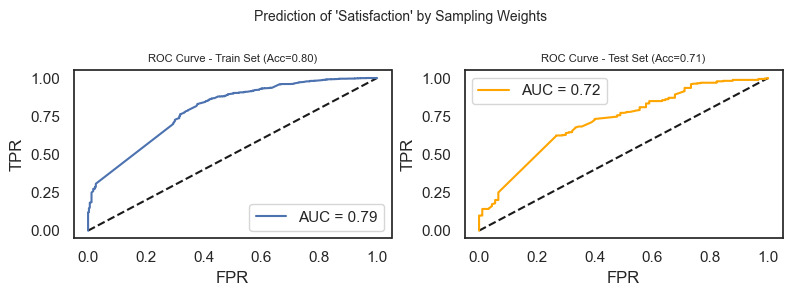

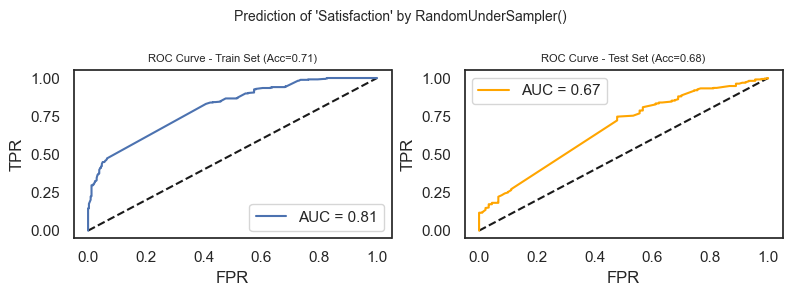

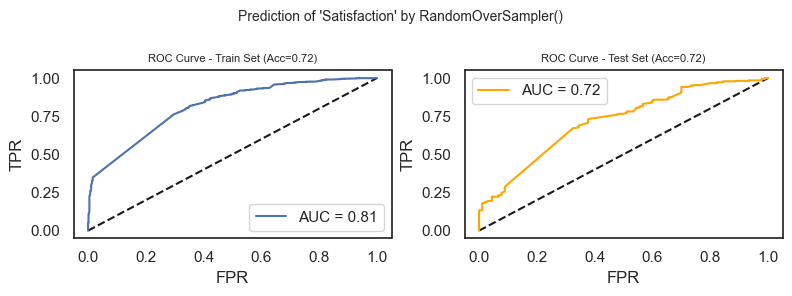

In [184]:
plot_curve(xgb_feedback,df_feedback_no_na,'Satisfaction','Feedbacks_lem')
plot_curve(xgb_feedback,df_feedback_no_na,'Satisfaction','Feedbacks_lem', sampler[0])
plot_curve(xgb_feedback,df_feedback_no_na,'Satisfaction','Feedbacks_lem', sampler[1])

#### Plotting our results based on suggestions

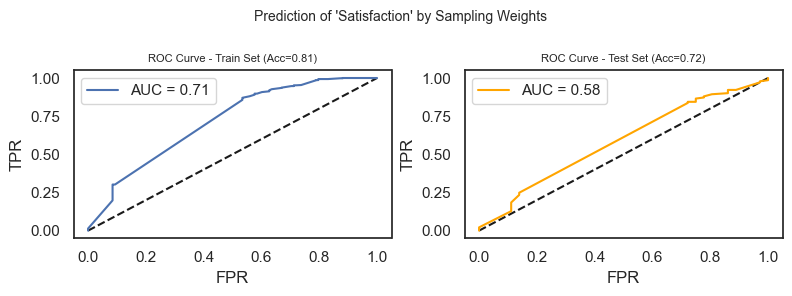

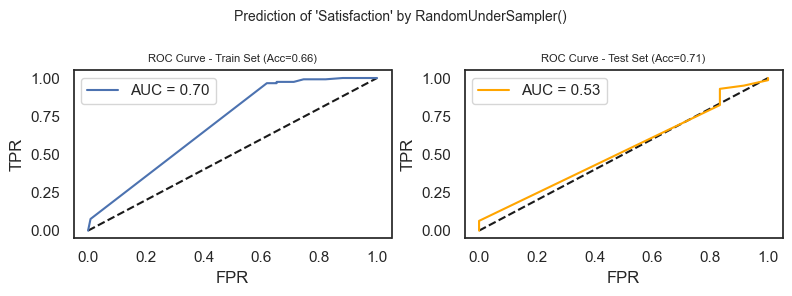

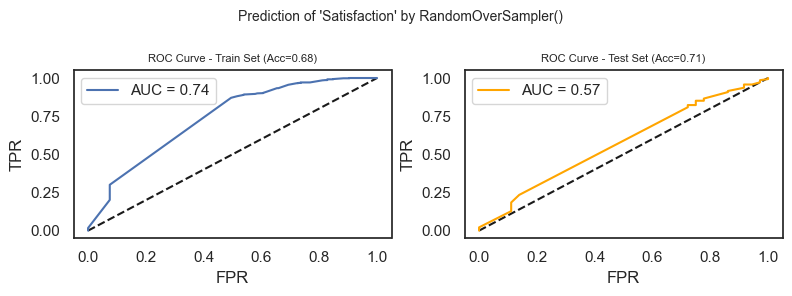

In [185]:
xgb_suggestion = XGBClassifier(n_estimators=1200,learning_rate=0.001,max_depth=2, random_state=24)

plot_curve(xgb_suggestion,df_suggestion_no_na,'Satisfaction','Suggestions_lem')
plot_curve(xgb_suggestion,df_suggestion_no_na,'Satisfaction','Suggestions_lem', sampler[0])
plot_curve(xgb_suggestion,df_suggestion_no_na,'Satisfaction','Suggestions_lem', sampler[1])

## Distribution of rates in our DataDrames

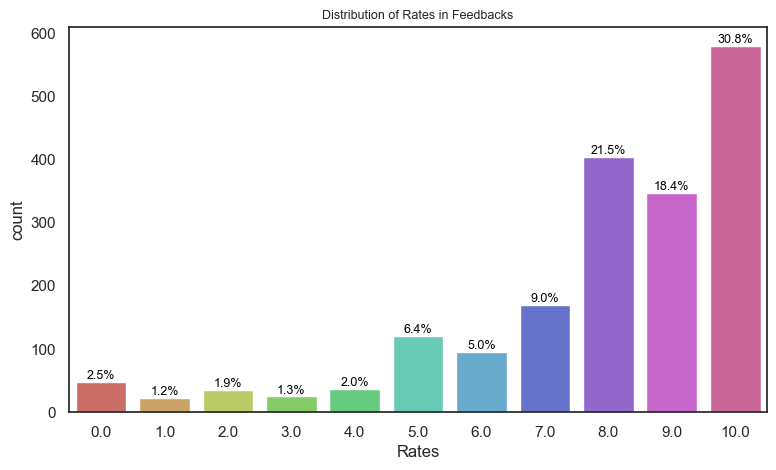

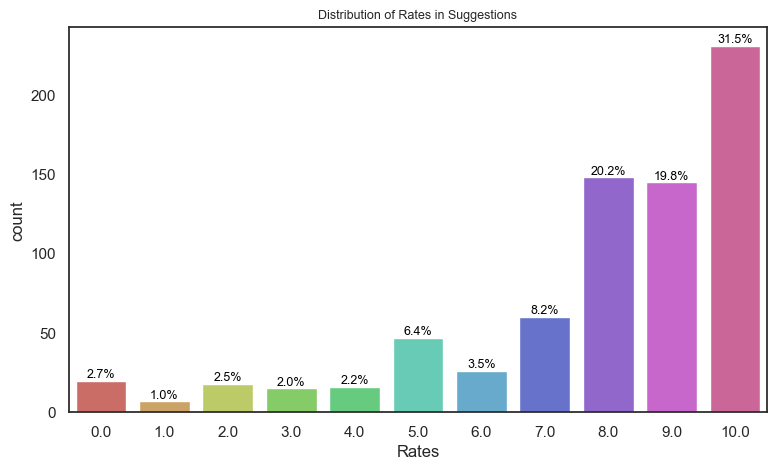

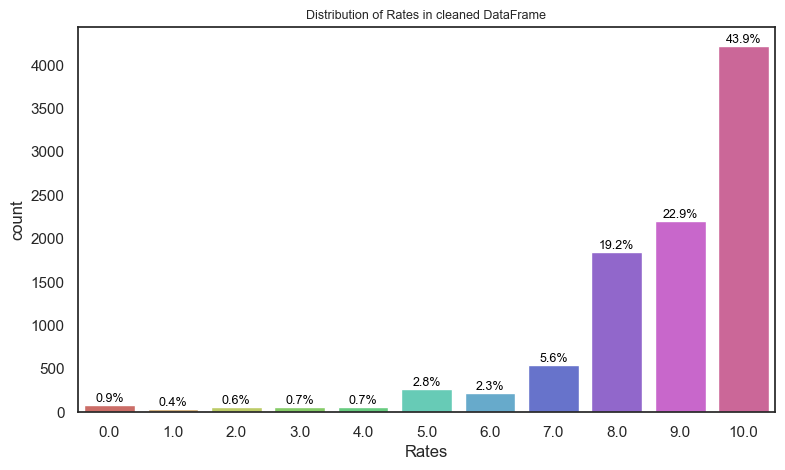

In [186]:
distribution(df_feedback,'Rates','Feedbacks') 
distribution(df_suggestion,'Rates','Suggestions')
distribution(df_clean,'Rates','cleaned DataFrame') 

#### Balancing and mapping our target

In [187]:
mapping = {0.0: 0, 1.0: 0, 2.0: 0, 3.0: 0, 4.0: 0, 5.0: 0, 6.0: 0, 7.0: 0,                 
           8.0: 1, 9.0: 1, 
           10.0: 2}

#### Defining our DataFrames

In [188]:
df_balanced_feedback = df_feedback.dropna(subset=['Rates']).copy()
df_balanced_suggestion = df_suggestion.dropna(subset=['Rates']).copy()
df_balanced_clean = df_clean.dropna(subset=['Rates']).copy()

df_balanced_feedback['Rates'] = df_balanced_feedback['Rates'].map(mapping)
df_balanced_suggestion['Rates'] = df_balanced_suggestion['Rates'].map(mapping)
df_balanced_clean['Rates'] = df_balanced_clean['Rates'].map(mapping)

#### Plotting our new balanced DataFrames

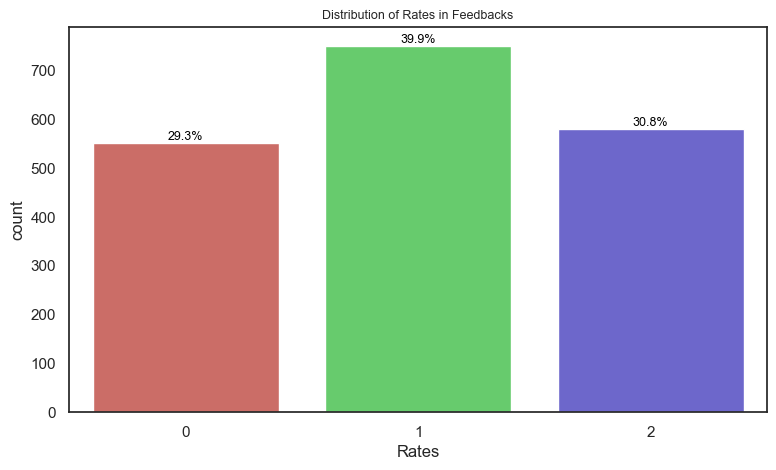

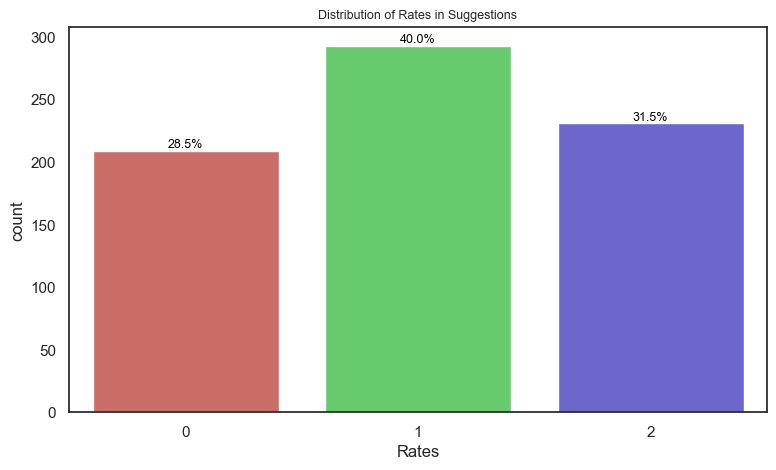

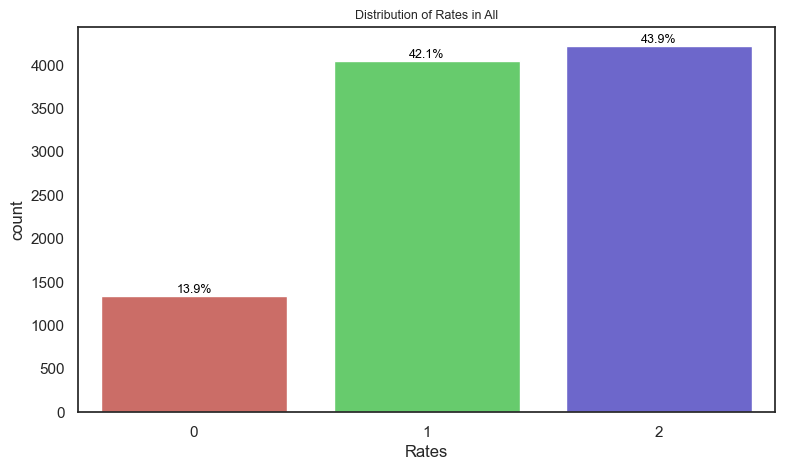

In [189]:
distribution(df_balanced_feedback,'Rates','Feedbacks') 
distribution(df_balanced_suggestion,'Rates','Suggestions')
distribution(df_balanced_clean,'Rates','All')

## Prediction of rates

In [190]:
import prediction_script
from prediction_script import metrics_multiclass, prediction

#### Defining our model and samplers

In [191]:
sampler = [RandomUnderSampler(),RandomOverSampler()]

xgb = XGBClassifier(
    n_estimators=1000,
    learning_rate=0.01,
    max_depth=3,
    reg_alpha=0.1,  # L1 regularization
    reg_lambda=0.1, # L2 regularization
    objective='multi:softprob',
    num_class=3,
    eval_metric='mlogloss',
    random_state=24
)

#### Printing our results based on feedbacks

In [192]:
prediction(xgb, df_balanced_clean, 'Rates', 'Feedbacks_lem')
prediction(xgb, df_balanced_clean, 'Rates', 'Feedbacks_lem',sampler[0])
prediction(xgb, df_balanced_clean, 'Rates', 'Feedbacks_lem',sampler[1])


Sampler : None
TRAIN | Accuracy : 0.55, AUC : 0.67
TEST  | Accuracy : 0.46, AUC : 0.57

Sampler : RandomUnderSampler()
TRAIN | Accuracy : 0.54, AUC : 0.72
TEST  | Accuracy : 0.45, AUC : 0.57

Sampler : RandomOverSampler()
TRAIN | Accuracy : 0.52, AUC : 0.69
TEST  | Accuracy : 0.46, AUC : 0.57


## Topic modeling based on feedbacks

#### Required functions

In [65]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel, Phrases
from gensim.models.phrases import Phraser
import spacy
import pyLDAvis
import pyLDAvis.gensim
import pyLDAvis.gensim_models as gensimvis

In [66]:
import topic_modeling
from topic_modeling import make_ngram, text_to_bow, dominant_topic

### Feedbacks with rate < 7

In [67]:
df_rate_bigram = df_feedback.loc[df_feedback['Rates'] < 7 ].copy()

In [68]:
data_words = df_rate_bigram['Feedbacks_tokens'].tolist()
df_rate_bigram['ngrams'] = make_ngram(data_words)
id2word = corpora.Dictionary(df_rate_bigram['ngrams'])
df_rate_bigram['id2word'] = df_rate_bigram['ngrams'].apply(lambda x: id2word.doc2bow(x))
corpus = list(df_rate_bigram['id2word'])

In [69]:
k = 4

lda_model = gensim.models.ldamodel.LdaModel(
    corpus=corpus,              
    id2word=id2word,           
    num_topics=k,              
    random_state=100,           
    update_every=1,             
    chunksize=len(corpus),      
    passes=10,                  
    alpha="auto",               
    per_word_topics=True,       
    iterations=50)

vis = gensimvis.prepare(lda_model, corpus, id2word, mds = "mmds", R=10,sort_topics=True)
pyLDAvis.display(vis)

In [70]:
df_rate_res = df_rate_bigram.copy()
df_rate_res = df_rate_res[df_rate_res['ngrams'].apply(lambda x : len(x) > 0)].drop(['Feedbacks_lem', 'Feedbacks_tokens', 'Satisfaction', 'id2word'], axis=1)
df_rate_res['topics'] = df_rate_res['ngrams'].apply(lambda x: lda_model[id2word.doc2bow(x)][0])

df_rate_res['dominant_topic'] = df_rate_res['topics'].apply(lambda x : dominant_topic(x))
df_rate_res = df_rate_res.drop(columns = ['topics'])

#### Cluster 0 : food_drink & duty_free

Interpretations :

- Limited and terrible food selection
- Food too expensive
- Duty-free stores should be open until the last flights
- Too much duty-free, too many ads, looks too much like a shopping mall
- Create another access route/shortcut to avoid having to go through all the duty-free stores

In [80]:
df_rate_res.loc[df_rate_res['dominant_topic'] == 0].sort_values(by=["Rates"]).head(4)

,Rates,Feedbacks_clean,ngrams,dominant_topic
701,1.0,travelling though edinburgh airport is a dismal experience the place is dingy and uninviting and it is very hard to escape from noise and background music the choice is food is awful you are just trapped in a shopping mall and the sole aim seems to be to extract as much money from you as possible while you are there i have tried the lounges and given up using them they are dirty noisy and overcrowded the food and drink on offer is dreadful and there is nowhere comfortable for businesspeople to work while in transit the staff at security are frequently rude and shout aggressively at passengers the security space is very poorly designed and going through it is an ordeal for passengers who are elderly andor have mobility issues i only travel through edinburgh because i have no choice but to do so i would gladly avoid it if i could because its an absolute dump and has no redeeming features whatsoever,[food_drink],0
972,1.0,very disappointed with a number of issues firstly i enquired about ordering duty free to be collected on my return and was told that you did not do that yet you have adverts all over the place promoting just that secondly there is always a delay waiting for baggage on my return carousel broke down they had to man handle the skis and some of the bags eventually\nevery year when i go through passport control i stand in a huge queue for the automatic check which never works for me eventually the automatic rejects me and i have go through a manual check why could i not go through manual to start with \nit was the same when i travelled for business for many years i am nearly and standing for that ridiculous length of time is extremely hard going,"[duty_free, passport_control]",0
9481,1.0,gate side is one large building site \nsecurity area building site \nlounge building site \nairport parking far too expensive \nfood and drink gate side really expensive \nonly one lounge available \nentire airport is dated and dismal compared to modern european destinations,[food_drink],0
5034,2.0,keep the duty free open for last flights and other cafe and basic shops,[duty_free],0


#### Cluster 1 : special_assistance ( & capital_city)

Interpretations :

- The assistance service is inadequate; more staff are needed
- Too many stairs, not enough elevators/escalators

In [81]:
df_rate_res.loc[df_rate_res['dominant_topic'] == 1].sort_values(by=["Rates"]).head(5)

,Rates,Feedbacks_clean,ngrams,dominant_topic
170,2.0,think the airport simply looks awful needs a complete rebuild or clever internal redesign to make it brighter and fresh looking think its a disgrace as our capital city airport,[capital_city],1
8155,3.0,special assistance services needs to work,[special_assistance],1
9975,3.0,having been in airports in weeks edinburgh airport is an embarrassment for scotlands capital city,[capital_city],1
1084,4.0,please increase the staff and resources of special assistance with an aging population there needs to be enough chairs and porters to move passengers safely through the airport,[special_assistance],1
3661,5.0,more recognition in passport queues etc for very seniors who elect not to over burden the special assistance services,[special_assistance],1


#### Cluster 2 : passeport_control

Interpretations

- Excessively long queue for passport control
- Self-checking doesn't work
- Create a family queue for passport control
- Chaotic, poorly organized

In [82]:
df_rate_res.loc[df_rate_res['dominant_topic'] == 2].sort_values(by=["Rates"]).head(5)

,Rates,Feedbacks_clean,ngrams,dominant_topic
647,0.0,passport control forces people with children to queue for longer than those without children there should be a specific queue for those with children,[passport_control],2
1206,1.0,please sort out security while you have upgraded the technology on the scanners the system pre and postscanners is chaotic and does not work for travellers or staff i have travelled through many airports some busier than edinburgh and i have never seen such a poorly organised security hall you have created bottlenecks at the start and end with too much wasted space in the middle of the room please please please review it and get some external advice it is a nightmare for most but makes travelling with small children almost impossible similarly for passport control it is unbelievable that you do not have a family lane again the lines create massive bottlenecks prior to the passport scanning gates and on our last return at am the hall was full with a long line and at least of and border control desks were unused no family lane and chaos everywhere please get it sorted it is an embarrassment for an airport and city of our size to welcome people this way,[passport_control],2
5050,1.0,i am lucky to have travelled to many airports over the world edinburgh seems to be the only one including third world countries that expect you to walk in all weathers from or to a plane over the tarmac there is always one two or three stairways to climb where are the escalators after you disembark then usually down some other stairs to passport control always in cold horrible walkways there are never ever enough immigration staff on duty to check your passports we are all heralded like cattle then there is the wait for your suitcase will it be one hour or two or who knows always the excuse that a few flights have landed at the same time did you not know this was going to happen where is the planning i have been to large international airports cleared immigration and got my case all within mins why cannot edinburgh do the same,"[passport_control, like_cattle]",2
7909,1.0,passport control on reentry is very slow and needs to be improved also the international arrivals is very difficult for older people to negotiate with too many stairs and not enough elevators or escalators,[passport_control],2
4443,2.0,the experience on returning to edinburgh is truly the worst in the world passport machines which do not work and which were made to line up at whilst there is no one at the human passport control inordinately long time to wait for baggage not a nice environment to walk through why no rate your experience when arriving only for departure the arrival experience is just as important and you are not a good welcome for visitors,[passport_control],2


##### Cluster 3 : like_cattle & car_park

Interpretations

- The airport environment (construction, cleanliness, being crammed into queues) and the way security agents treat customers make them feel like cattle.
- Lack of signage in the parking lot.
- Flooding in the parking lot during heavy rain.
- Excessively expensive parking; you have to pay even to drop people off.
- The parking lot should accept payment by phone to speed up the queues.
- Lack of spaces in the parking lot, leading people to park anywhere, making it difficult to get around.
- It's a long walk from the parking lot to the airport; shuttles should be set up.
- The parking lot doesn't recognize license plates if you pay in advance; you have to call an agent, which takes time.

In [74]:
df_rate_res.loc[df_rate_res['dominant_topic'] == 3].sort_values(by=["Rates"]).head(5)

,Rates,Feedbacks_clean,ngrams,dominant_topic
6847,0.0,the airport outside and inside is filthy the entrance for arrivals looks like a cattle she would metal work with open roof structures etc delivery service at baggage reclaim constantly slow and trolleys available now being charged for and as i experienced whilst paying for a trolley a fellow traveler took the one id paid for then advised by staff id need to pay for another its a very poor welcome for home coming and international travellers and frankly embarrassing,[like_cattle],3
906,1.0,car parking is ludicrously and indefensibly expensive car park ticket machines do not take payments from phones slowing everyone else down the exit experience for domestic passengers is depressingly lowrent stumbling down a cheap set of stairs and the current private hire contract with capital cars is an utter disaster for passengers more expensive for every single journey and their drivers are a danger to everyone,[car_park],3
7186,1.0,edinburgh airport is better than glasgow airport without a doubt however my god first thing you see once you step foot in this country is the utter disgraceful passport check built in a refurbished warehouse its an embarrassment go to other countries and see their grand airports and take notes the queue was ridiculous as the small warehouse where we are packed like cattle waiting for our turn to get checked or scanned in is abysmal and i am ashamed that visitors of our country need to go through that the start of my holiday hype was shattered as i had booked airport parking for my car in the long stay however the sheer lack of spaces and orangisation is shocking i think i was very lucky to find a space cars parked up curbs and up platforms to just get a space and car parked in the connecting roads of the car parking is shocking all these people like myself pay money to get a space and it appears they are not guaranteed a space shocking and embarrassing,[like_cattle],3
4820,3.0,try focus on how to serving people better rather than exploiting people to pay extra unnecessary services the car park is rubbish and took a long way to walk you cannot even drop people off without paying,[car_park],3
9808,4.0,the accuracy of available spaces indicated in the multi storey car park needs enhanced it is never correct,[car_park],3


### Feedbacks with negativity over > 0.7

In [75]:
df_neg_bigram = roberta_feedback.loc[roberta_feedback['roberta_neg'] >= 0.7].copy()

In [76]:
data_words = df_neg_bigram['Feedbacks_tokens'].tolist()
df_neg_bigram['ngrams'] = make_ngram(data_words)
id2word = corpora.Dictionary(df_neg_bigram['ngrams'])
df_neg_bigram['id2word'] = df_neg_bigram['ngrams'].apply(lambda x: id2word.doc2bow(x))
corpus = list(df_neg_bigram['id2word'])

In [77]:
k = 4

lda_model = gensim.models.ldamodel.LdaModel(
    corpus=corpus,              
    id2word=id2word,           
    num_topics=k,              
    random_state=100,           
    update_every=1,             
    chunksize=len(corpus),      
    passes=10,                  
    alpha="auto",               
    per_word_topics=True,       
    iterations=50,             
)

vis = gensimvis.prepare(lda_model, corpus, id2word, mds = "mmds", R=10,sort_topics=True)
pyLDAvis.display(vis)

In [78]:
df_neg_res = df_neg_bigram.copy()
df_neg_res = df_neg_res[df_neg_res['ngrams'].apply(lambda x : len(x) > 0)].drop(['Feedbacks_lem', 'Feedbacks_tokens', 'Satisfaction', 'id2word'], axis=1)
df_neg_res['topics'] = df_neg_res['ngrams'].apply(lambda x: lda_model[id2word.doc2bow(x)][0])
df_neg_res['dominant_topic'] = df_neg_res['topics'].apply(lambda x : dominant_topic(x))
df_neg_res = df_neg_res.drop(columns = ['topics'])

##### Cluster 1 : Luggage Trolley

Interpretations:

- Unfair fees: Passengers strongly oppose baggage trolley charges, calling the practice "pathetic," "humiliating," and "outrageous."
- Negative image: These fees harm Scotland's reputation among visitors and tarnish Edinburgh Airport's image as a capital city hub.

In [79]:
df_neg_res.loc[df_neg_res['dominant_topic'] == 1].sort_values(by=["roberta_neg"], ascending = False).head(5)

,roberta_neg,roberta_neu,roberta_pos,Rates,Feedbacks_clean,ngrams,dominant_topic
625,0.966749,0.030101,0.003150,5.0,the idea of having to pay at an international airport for a luggage trolley is pathetic and embarrassing it greatly inconveniences passengers and is the worst idea i have seen at an airport in some time,[luggage_trolley],1
831,0.961746,0.034680,0.003574,0.0,the luggage trolley charging system is an absolute disgrace the infrastructure airside is shocking edinburgh airport is an embarrassment as scotlands capital airport the greedy owners should be ashamed of themselves,[luggage_trolley],1
1030,0.923676,0.070763,0.005561,7.0,it is disheartening and frustrating to see charges for services which should be free eg drop off near airport use of luggage trolley for use of a luggage trolley is outrageous,"[luggage_trolley, luggage_trolley]",1
1524,0.891941,0.101955,0.006105,6.0,stop the charge for luggage trolleys it gives a very bad image of scotland to new visitors,[luggage_trolley],1
198,0.854326,0.135722,0.009952,10.0,you need to stop monetising everything cost of drop off is ridiculous and i noticed you now need to pay for a luggage trolley,[luggage_trolley],1
